# Explorating visualization of ENEM 2016

**ENEM** is the National Exam of High School, the main way to acess the Public University in Brazil. In 2016, there were more than 228 thousand of University vacancies, mostly in federal universities, such as Federal University of Rio de Janeiro, Federal University of Minas Gerais and since ENEM 2016, the University of São Paulo.

ENEM also permitts you to get a scholarship in private universities, by ProUni. Until 2016, ENEM was able to get a degree to people who did not graduate high school in regular time.

Here, we did an exploratory visualization of the microdata of ENEM 2016, with information from all of the participants of the test. We managed to only work with the state of **Minas Gerais** data, because we thought it was a state with a lot of similarities with Brazil itself. We only wanted to work with the grade in the Mathematics test, due our untrivial interest in this science.

In [1]:
from IPython.display import display, HTML
import pandas as pd
import pickle
import matplotlib.pyplot as plt
MINAS = pd.read_pickle('enem_2016_minas.pkl') #Here we use this pickle: 
## https://drive.google.com/open?id=1vTWRTok9ldvtYMmEUNTZYv0JaGbRRNII

In [2]:
MINAS1 = MINAS.sample(frac=0.001) #Here we get a random sample of the data. It's necessary to get more information from the visualizations.

In [3]:
list(MINAS)
a = ''
for item in MINAS:
    a = a + ', ' + item
a
#All the data. You can read the dictionary to this tags in 
## https://drive.google.com/file/d/1zYSiqmf_Ov21EMM7-F6WPevVA6fHvtvl/view?usp=sharing

', NU_INSCRICAO, NU_ANO, CO_MUNICIPIO_RESIDENCIA, NO_MUNICIPIO_RESIDENCIA, CO_UF_RESIDENCIA, SG_UF_RESIDENCIA, NU_IDADE, TP_SEXO, TP_ESTADO_CIVIL, TP_COR_RACA, TP_NACIONALIDADE, CO_MUNICIPIO_NASCIMENTO, NO_MUNICIPIO_NASCIMENTO, CO_UF_NASCIMENTO, SG_UF_NASCIMENTO, TP_ST_CONCLUSAO, TP_ANO_CONCLUIU, TP_ESCOLA, TP_ENSINO, IN_TREINEIRO, CO_ESCOLA, CO_MUNICIPIO_ESC, NO_MUNICIPIO_ESC, CO_UF_ESC, SG_UF_ESC, TP_DEPENDENCIA_ADM_ESC, TP_LOCALIZACAO_ESC, TP_SIT_FUNC_ESC, IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DEFICIENCIA_AUDITIVA, IN_SURDO_CEGUEIRA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_MENTAL, IN_DEFICIT_ATENCAO, IN_DISLEXIA, IN_DISCALCULIA, IN_AUTISMO, IN_VISAO_MONOCULAR, IN_OUTRA_DEF, IN_SABATISTA, IN_GESTANTE, IN_LACTANTE, IN_IDOSO, IN_ESTUDA_CLASSE_HOSPITALAR, IN_SEM_RECURSO, IN_BRAILLE, IN_AMPLIADA_24, IN_AMPLIADA_18, IN_LEDOR, IN_ACESSO, IN_TRANSCRICAO, IN_LIBRAS, IN_LEITURA_LABIAL, IN_MESA_CADEIRA_RODAS, IN_MESA_CADEIRA_SEPARADA, IN_APOIO_PERNA, IN_GUIA_INTERPRETE, IN_MACA, IN_COMPUTAD

## Gender analysis
Here we want to see the possible diferences between male and female participants.

In [4]:
sort = MINAS.sort_values(by=['NU_NOTA_MT'], ascending=False)
TESTE = sort[['NU_NOTA_MT','NU_IDADE', 'TP_SEXO']]

In [5]:
TESTE.dropna(axis=0, how='any')
TESTE.head()

,NU_NOTA_MT,NU_IDADE,TP_SEXO
1254190,991.5,19.0,M
2809767,991.5,26.0,M
4649479,991.5,25.0,F
799655,991.5,17.0,F
1549642,991.5,17.0,M


In [6]:
TESTE.groupby(['TP_SEXO'])['NU_NOTA_MT'].describe()

,count,mean,std,min,25%,50%,75%,max
TP_SEXO,,,,,,,,
F,376193.0,490.981906,102.592931,0.0,413.6,470.2,550.4,991.5
M,266301.0,536.515841,118.334317,0.0,442.9,520.8,616.2,991.5


# Age analysis
Here we want to analyse the average grade in all ages. Again, people from all ages take ENEM to join University or graduate in High School. We ploted all ages but after 60 there was a lot of noise. 

## Average by age

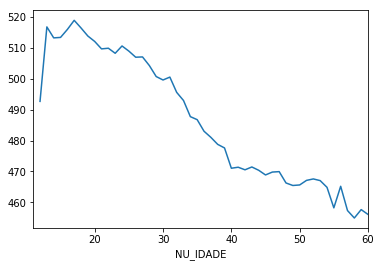

In [7]:
media_idade = TESTE.groupby(['NU_IDADE'])['NU_NOTA_MT'].mean()
media_idade_60 = TESTE[TESTE['NU_IDADE']<=60].groupby(['NU_IDADE'])['NU_NOTA_MT'].mean()
media_idade = media_idade_60
media_idade.plot()
plt.show()

## Certification of Conclusion by age

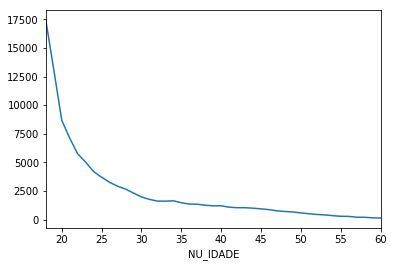

In [8]:
c = sort[['IN_CERTIFICADO','NU_IDADE']]
c = c[c['NU_IDADE']<=60] 
c = c[c['IN_CERTIFICADO']==1].groupby('NU_IDADE')['IN_CERTIFICADO'].count()
c.plot()
plt.show()

# Ethnicity analysis

In [9]:
sort1 = MINAS1.sort_values(by=['NU_NOTA_MT'], ascending=False)
raca = sort[['NU_NOTA_MT','TP_COR_RACA']]
C= raca.groupby(['TP_COR_RACA'])['NU_NOTA_MT'].mean()
C
# 0 = Not Declared
# 1 = White
# 2 = Black
# 3 = Brown
# 4 = Yellow
# 5 = Indigenous
# 6 = No data

TP_COR_RACA
0    553.948973
1    532.818724
2    483.500812
3    500.063269
4    491.847148
5    472.061667
6    536.381818
Name: NU_NOTA_MT, dtype: float64

In this analisys we can see how ethinicity affects the grades in ENEM.  

In [10]:
plt.rcParams["figure.figsize"] = [12, 9]
sort1 = MINAS.sort_values(by=['NU_NOTA_MT'], ascending=False)
raca1 = sort1[['NU_NOTA_MT','TP_COR_RACA']]
B = raca1['TP_COR_RACA']
A = raca1['NU_NOTA_MT']

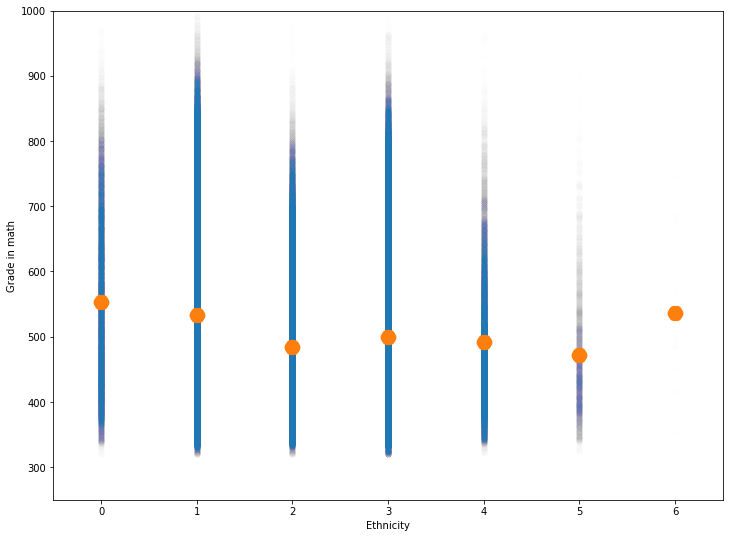

In [11]:
plt.xlabel("Ethnicity")
plt.ylabel("Grade in math")
plt.scatter(B, A, alpha=0.002, linewidths=0.7)
plt.scatter(list(range(0,7)), C, marker='H', linewidths=10)
plt.axis([-0.5, 6.5, 250, 1000])
plt.show()
# 0 = Not Declared
# 1 = White
# 2 = Black
# 3 = Brown
# 4 = Yellow
# 5 = Indigenous
# 6 = No data

# Family analysis
Here, we want to discover how much family data can influence the grade in math.

In [12]:
FAMILIA = MINAS[['NU_NOTA_MT', 'Q005']] #Q005 = How much people are living with the participant in the same house.
A, B = list(FAMILIA['NU_NOTA_MT']), list(FAMILIA['Q005'])
C = list(FAMILIA.groupby(['Q005']).mean()['NU_NOTA_MT'])

In [13]:
FAMILIA.describe()

,NU_NOTA_MT,Q005
count,642494.000000,954219.000000
mean,509.854818,3.885518
std,111.668706,1.491559
min,0.000000,1.000000
25%,423.600000,3.000000
50%,488.800000,4.000000
75%,579.500000,5.000000
max,991.500000,20.000000


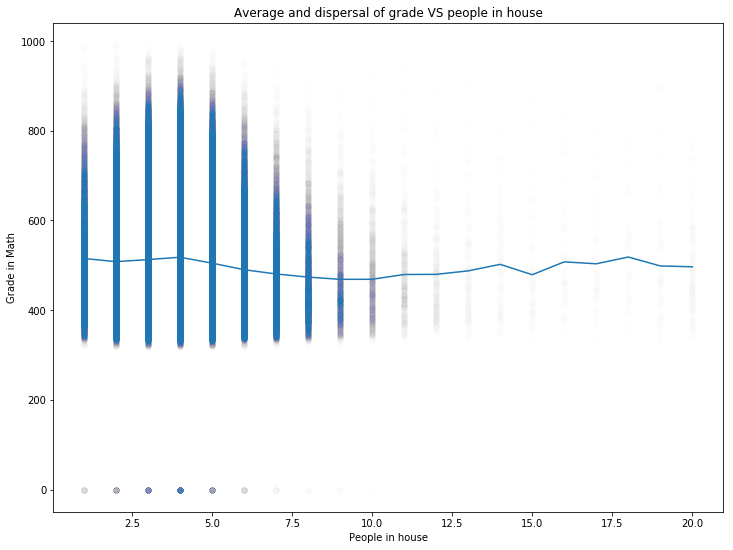

In [14]:
plt.xlabel("People in house")
plt.ylabel("Grade in Math")
plt.scatter(B, A, alpha=0.002)
plt.plot(list(range(1, 21)), C)
plt.title('Average and dispersal of grade V people in house')
plt.show()

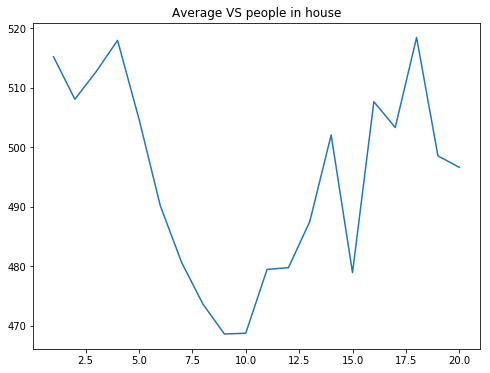

In [15]:
plt.rcParams["figure.figsize"] = [8, 6]
plt.plot(list(range(1, 21)), C)
plt.title('Average V people in house')
plt.show()

It's a good discution if this makes any real influence, because after 10 people there are so few data, we need to be smart to check if this is not noise.

# Family income analysis

In [16]:
RENDA = MINAS[['NU_NOTA_MT', 'Q006']]
RENDA.dropna(axis=0, how='all')
D, E = list(RENDA['NU_NOTA_MT']), list(RENDA['Q006'])
F = list(RENDA.groupby(['Q006']).mean()['NU_NOTA_MT'])
G = []
for item in E:
    if item == 'A':
        G.append(0)
    if item == 'B':
        G.append(880)
    if item == 'C':
        G.append(1320)
    if item == 'D':
        G.append(1760)
    if item == 'E':
        G.append(2200)
    if item == 'F':
        G.append(2640)
    if item == 'G':
        G.append(3520)
    if item == 'H':
        G.append(4400)
    if item == 'I':
        G.append(5280)
    if item == 'J':
        G.append(6160)
    if item == 'K':
        G.append(7040)
    if item == 'L':
        G.append(7920)
    if item == 'M':
        G.append(8800)
    if item == 'N':
        G.append(10560)
    if item == 'O':
        G.append(13200)
    if item == 'P':
        G.append(17600)
    if item == 'Q':
        G.append(20000)

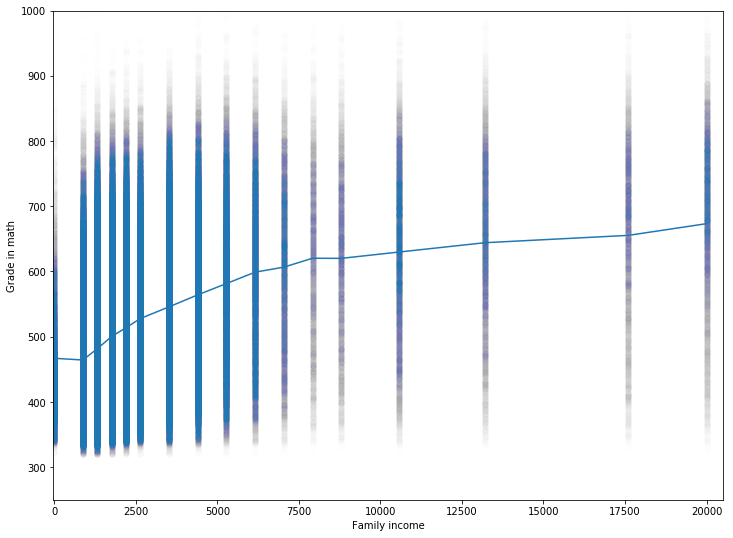

In [17]:
plt.rcParams["figure.figsize"] = [12, 9]
plt.xlabel("Family income")
plt.ylabel("Grade in math")
plt.scatter(G, D, alpha=0.002)
plt.plot([0,880, 1320, 1760, 2200, 2640, 3520, 4400, 5280, 6160, 7040, 7920, 8800, 10560, 13200, 17600, 20000], F)
plt.axis([-25, 20500, 250, 1000])
plt.show()

This is just a proof of how richer people do better in exams. It matches our expectancy.

# Mathematics vs Other Sciences

In [28]:
MINAS1 = MINAS.sample(frac=0.1)

## Essay

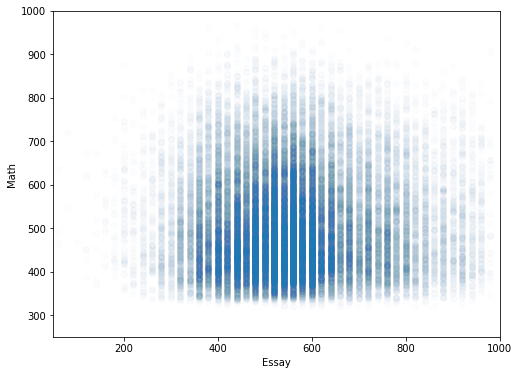

In [42]:
MAT, RED = list(MINAS1['NU_NOTA_MT']), list(MINAS1['NU_NOTA_REDACAO'])
plt.rcParams["figure.figsize"] = [8, 6]
plt.scatter(REDACAO, MAT, alpha=0.01)
plt.xlabel("Essay")
plt.ylabel("Math")
plt.axis([50, 1000, 250, 1000])
plt.show()

**WARNING**: It's very important to know you can only get multiples of $20$ in your essay. 

## Languages

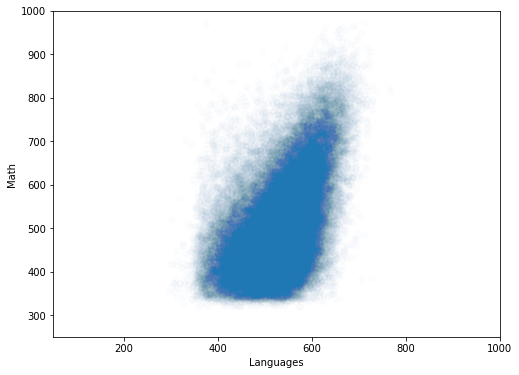

In [43]:
MAT, PORT = list(MINAS1['NU_NOTA_MT']), list(MINAS1['NU_NOTA_LC'])
plt.rcParams["figure.figsize"] = [8, 6]
plt.scatter(PORT, MAT, alpha=0.01)
plt.axis([50, 1000, 250, 1000])
plt.xlabel("Languages")
plt.ylabel("Math")
plt.show()

## Natural Sciences

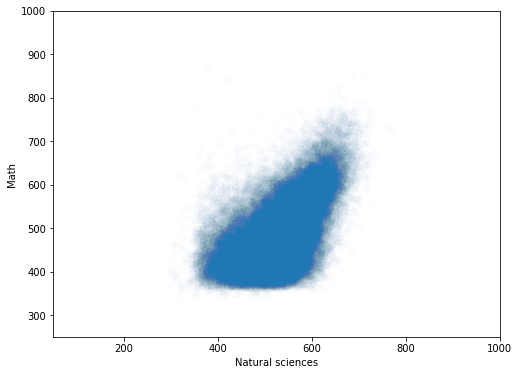

In [44]:
MAT, NS = list(MINAS1['NU_NOTA_MT']), list(MINAS1['NU_NOTA_CN'])
plt.rcParams["figure.figsize"] = [8, 6]
plt.scatter(PORT, NS, alpha=0.01)
plt.axis([50, 1000, 250, 1000])
plt.xlabel("Natural sciences")
plt.ylabel("Math")
plt.show()

In [ ]:
MAT, HS = list(MINAS1['NU_NOTA_MT']), list(MINAS1['NU_NOTA_CN'])
plt.rcParams["figure.figsize"] = [8, 6]
plt.scatter(PORT, NS, alpha=0.01)
plt.axis([50, 1000, 250, 1000])
plt.xlabel("Natural sciences")
plt.ylabel("Math")
plt.show()